This project was design to help me get familiarize with using Python for Data Science projects.
It's a data scientist approach to a common problem affecting most creditors in the financial sector.

## Background:

Over the past year or so Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right immediately. They have enlisted the help of our Data Science team to design and implement a creative, empirically sound solution. Due to the magnitude of the problem and its urgency, we have been given full authority to solve this problem with whatever tools and methods needed. As such, this problem was treated different from a typical data analytic problem. We've elected to use Python and a few different libraries to do the heavy lifting for us. We'll be using a few main libraries for the bulk of our work, but by no means intend to be limited to only using those. Other libraries and tools will be explored to obtain the best solution within shortest possible time.
 
As highlighted in the data science process framework, first thing is to define the problem and understand the differences between this data science project and regular data analytic projects. Secondly, a dedicated local programming environment is will be establised where GitHub will be utilize to aid with work performance without needing to be in one space or another to have access to the needed tools, before finally starting the analysis and solving this problem.

# Business Problem:
1. Increase in customer default rates - This is bad for Credit One since Credit One approves the customers for loans
   in the first place.
2. Revenue and customer loss for clients and, eventually, loss of clients for Credit One

## Investigative Questions:
How can we ensure that customers can/will pay their loans? Is this possible?
 
## Considering Credit One lessons learned from a similar problem addressed in the previous year:
1. We cannot control customer spending habits
2. We cannot always go from what we find in our analysis to the underlying "why"
3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant 
   to the problem at hand?
4. What concrete information can we derive from the data we have?
5. What proven methods can we use to uncover more information and why?

# Load Data

In [1]:
import pandas as pd

In [2]:
LoanFile = pd.read_csv(r"C:\Users\ietuk\Documents\gitHub_Python\default _credit_card_clients.csv", header=1)

In [3]:
LoanFile.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
LoanFile.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
LoanFile.describe()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Pre-processing

In [6]:
#rename dependent variable
LoanFile.rename(columns={'default payment next month':'default_payment'}, 
                 inplace=True)
 
print(LoanFile.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')


In [7]:
# check for data type
LoanFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5   

In [8]:
#Import Packages
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline

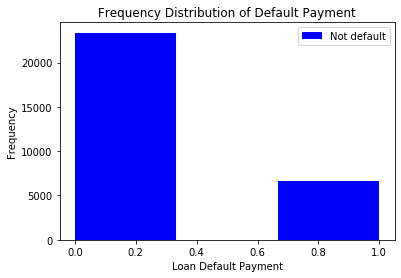

In [9]:
# plot histogram of the dependent variable default_payment_next_month
plt.hist(LoanFile.default_payment, color='b', bins=3,
        label=['Not default', 'Default'])
plt.xlabel('Loan Default Payment')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Default Payment')
plt.legend()

A quick glance of the data shows 30000 rows or instances and 25 columns or features. The data types are all integers. default_payment is the dependent variable.

The comparative analysis from the histogram plot above shows higher loan default payment rate from the data set. This confirms our client's concern. 


In [10]:
# check for missing data in the data set
LoanFile.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_payment    0
dtype: int64

In [11]:
# remove some attributes
LoanFile1 = LoanFile.drop(['ID', 'SEX', 'MARRIAGE'], axis=1)
print(LoanFile1)

       LIMIT_BAL  EDUCATION  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          20000          2   24      2      2     -1     -1     -2     -2   
1         120000          2   26     -1      2      0      0      0      2   
2          90000          2   34      0      0      0      0      0      0   
3          50000          2   37      0      0      0      0      0      0   
4          50000          2   57     -1      0     -1      0      0      0   
5          50000          1   37      0      0      0      0      0      0   
6         500000          1   29      0      0      0      0      0      0   
7         100000          2   23      0     -1     -1      0      0     -1   
8         140000          3   28      0      0      2      0      0      0   
9          20000          3   35     -2     -2     -2     -2     -1     -1   
10        200000          3   34      0      0      2      0      0     -1   
11        260000          1   51     -1     -1     -1     -1    

Data Reduction
Data Discretization

In [12]:
# create a new data set in .csv file to be used for exploratory analysis
new_LoanFile = LoanFile1.to_csv(r"C:\Users\ietuk\Documents\gitHub_Python\new_LoanFile.csv", index = None, header=True)


# Exploratory Analysis

After thoroughly cleaning, the data is ready to begin exploring it to gain further insight about the problem at hand and how we can use data science to solve it or at least gain a further understanding of it.

According to (Mayo, 2017), "Exploratory data analysis (EDA) is an integral aspect of any greater data analysis, data science, or machine learning project. Understanding data before working with it isn't just a pretty good idea, it is a priority if you plan on accomplishing anything of consequence."

In order to gain insight knowledge about the loan default data, we'd to breakdown the data exploration process into following:

1. Insight Visualization and Statistics about aach Variable/Attribute. 
2. Scatter plots comparing the relationships between any two variables.
3. If needed, visualizing the relationship between multiple variables.
4. Checking for collinearity or performing dimensionality reduction.

### Data Visualization

Using Histograms to visualize and understand how the data is univariately distributed in any given variable of the loan data set. 

Histograms are very useful for understanding how the data is distributed in any given single (univariate) variable. Lets have a look at how we can build histograms in Python.
The first item of business is to import the matplotlib library; it contains most of the major visualizations needed for this project.

In [13]:
# import and use newly created data set new_LoanFile
new_LoanFileDF = pd.read_csv(r"C:\Users\ietuk\Documents\gitHub_Python\new_LoanFile.csv")

In [14]:
new_LoanFileDF.head()


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,34,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,37,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,57,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
# Next, lets verify column names in our dataframe before plotting
header = new_LoanFileDF.dtypes.index
print(header)

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment'],
      dtype='object')


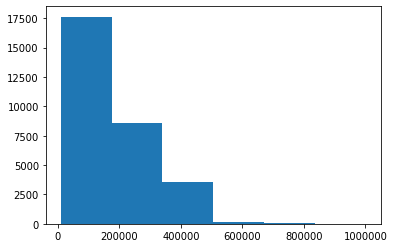

In [16]:
# Build histogram using .hist method of matplotlib to plots the 'LIMIT_BAL' variable
plt.hist(new_LoanFileDF['LIMIT_BAL'], bins=6)
plt.show()

We'll continue with univariate analysis by plotting multiple features

### LIne Plot
Line plots are often used in EDA to illustrate the range and mode of any given numerical variable. This can be very important for things like preventing bias and model overfit and even identifying collinearity.

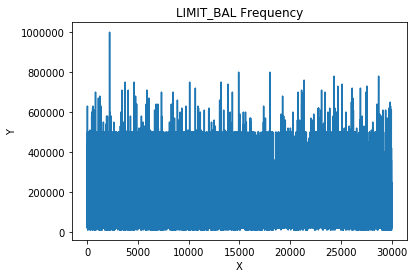

In [17]:
# Creating line plot of LIMIT_BAL
plt.plot(new_LoanFileDF['LIMIT_BAL'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("LIMIT_BAL Frequency")
plt.show()

### Scatter Plot Visualization
Scatter plots are useful for comparing two features (bivariate and multiple features (multivariate) to each other.
We will use this to understanding any possible relationships between the variables in the data set, but not confusing with causation.

In [18]:
# In order to create a comparison of 'PAY_0' to 'PAY_2', we must first set the two features equal to variables as follows:
x = new_LoanFileDF['PAY_0']
y = new_LoanFileDF['PAY_2']

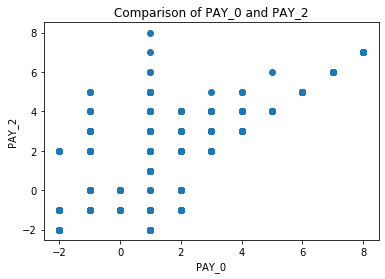

In [19]:
plt.scatter(x,y)
plt.xlabel('PAY_0')
plt.ylabel('PAY_2')
plt.title('Comparison of PAY_0 and PAY_2')
plt.show()

## Visualization with Box Plots

The Box or Whisker Plot below is for quickly visualizing where the bulk of the data is in variables. Looking features may help to uncover outliers or variances in the observations. Unerstanding what features might contain outliers is very important in Data Science and very important for Machine Learning. Lets look at the different components that make up a good box plot.
The lines that extend from either side of the 'box' in the middle of the plot can demonstrate the existence of outlying data points in the feature if point go beyond the ends of the lines (whiskers), but this doesn't necessarily mean there is an issue. 


In [20]:
header = new_LoanFileDF.dtypes.index
print(header)

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment'],
      dtype='object')


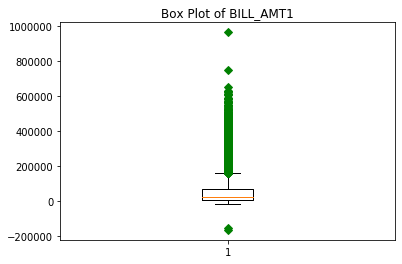

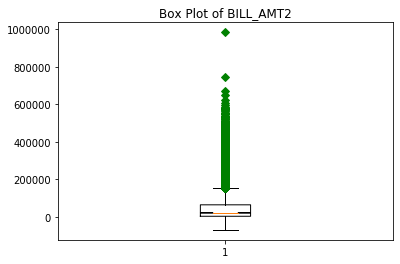

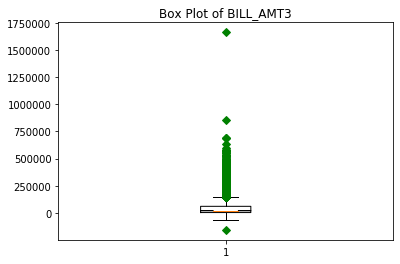

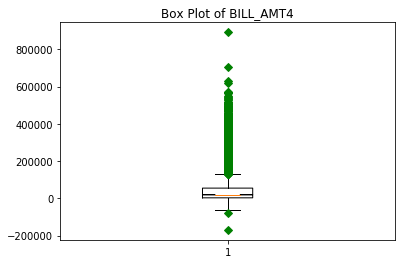

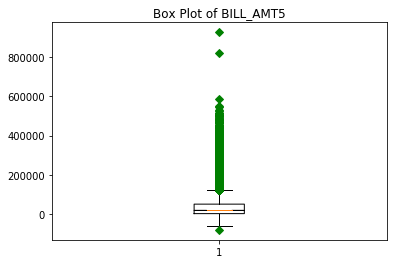

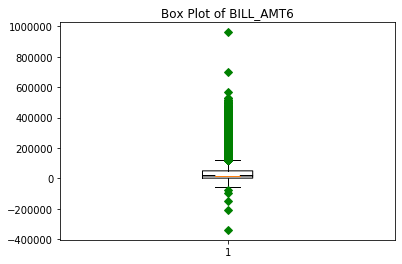

In [21]:
b1 = new_LoanFileDF['BILL_AMT1']
plt.boxplot(b1,0,'gD')
plt.title('Box Plot of BILL_AMT1')
plt.show()

b2 = new_LoanFileDF['BILL_AMT2']
plt.boxplot(b2,1,'gD')
plt.title('Box Plot of BILL_AMT2')
plt.show()

b3 = new_LoanFileDF['BILL_AMT3']
plt.boxplot(b3,2,'gD')
plt.title('Box Plot of BILL_AMT3')
plt.show()

b4 = new_LoanFileDF['BILL_AMT4']
plt.boxplot(b4,3,'gD')
plt.title('Box Plot of BILL_AMT4')
plt.show()

b5 = new_LoanFileDF['BILL_AMT5']
plt.boxplot(b5,4,'gD')
plt.title('Box Plot of BILL_AMT5')
plt.show()

b6 = new_LoanFileDF['BILL_AMT6']
plt.boxplot(b6,5,'gD')
plt.title('Box Plot of BILL_AMT6')
plt.show()

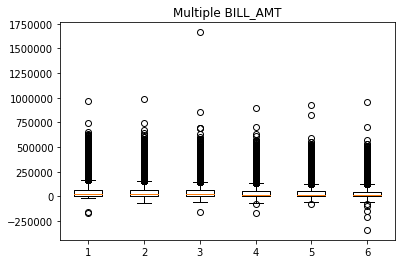

In [22]:
#Let's visualize box plot of BILL_AMT:
BILL_data = [b1, b2, b3, b4, b5, b6]
fig, ax6 = plt.subplots()
ax6.set_title('Multiple BILL_AMT')
ax6.boxplot(BILL_data)

plt.show()

Boxplots of BILL_AMT shows lots of outliers in each variable. There don't seem to exist an average bill amount in any of BILL variable 

## Correlation

Will use correlation to address collinearity and check for relationships between features for selection or engineering.

In [23]:
corrMat = new_LoanFileDF.corr()
print(corrMat)

                 LIMIT_BAL  EDUCATION       AGE     PAY_0     PAY_2     PAY_3  \
LIMIT_BAL         1.000000  -0.219161  0.144713 -0.271214 -0.296382 -0.286123   
EDUCATION        -0.219161   1.000000  0.175061  0.105364  0.121566  0.114025   
AGE               0.144713   0.175061  1.000000 -0.039447 -0.050148 -0.053048   
PAY_0            -0.271214   0.105364 -0.039447  1.000000  0.672164  0.574245   
PAY_2            -0.296382   0.121566 -0.050148  0.672164  1.000000  0.766552   
PAY_3            -0.286123   0.114025 -0.053048  0.574245  0.766552  1.000000   
PAY_4            -0.267460   0.108793 -0.049722  0.538841  0.662067  0.777359   
PAY_5            -0.249411   0.097520 -0.053826  0.509426  0.622780  0.686775   
PAY_6            -0.235195   0.082316 -0.048773  0.474553  0.575501  0.632684   
BILL_AMT1         0.285430   0.023581  0.056239  0.187068  0.234887  0.208473   
BILL_AMT2         0.278314   0.018749  0.054283  0.189859  0.235257  0.237295   
BILL_AMT3         0.283236  

In [24]:
new_LoanFileDF['BILL_AMT3'].isnull().values.any()

False

In [25]:
new_LoanFileDF['AGE'].isnull().values.any()

False

There is a strong correlation between the following variables:
o	PAY_4 and PAY3
o	PAY_4 and PAY_5
o	PAY_4 and PAY_6
o	PAY_5 and PAY_6
o	Between BILL_AMT sub-categories


## Covariance

From our understanding of the strength of relationships between any two variables using correlation analysis above, we can ascertain the impact one feature has on another. Covariance is often used to gauge the linear degree of change between two variables. We'll then use covariance to measure how changes in one variable are associated with changes in another variable. This will be very important when studying the impact various features might have on default rates. 

In [26]:
covMat = new_LoanFileDF.cov()
print(covMat)

                    LIMIT_BAL     EDUCATION            AGE         PAY_0  \
LIMIT_BAL        1.683446e+10 -22474.028945  173076.722569 -39545.930009   
EDUCATION       -2.247403e+04      0.624651       1.275380      0.093584   
AGE              1.730767e+05      1.275380      84.969755     -0.408639   
PAY_0           -3.954593e+04      0.093584      -0.408639      1.262930   
PAY_2           -4.603765e+04      0.115025      -0.553408      0.904330   
PAY_3           -4.443225e+04      0.107861      -0.585263      0.772384   
PAY_4           -4.057181e+04      0.100528      -0.535851      0.707972   
PAY_5           -3.667056e+04      0.087340      -0.562245      0.648743   
PAY_6           -3.509308e+04      0.074816      -0.517022      0.613292   
BILL_AMT1        2.727020e+09   1372.377644   38172.933546  15480.304170   
BILL_AMT2        2.570130e+09   1054.657595   35613.657962  15185.916919   
BILL_AMT3        2.548533e+09    712.664124   34334.251320  14011.556537   
BILL_AMT4   

In [27]:
# Remove highly correlated variables
LoanFile2 = new_LoanFileDF.drop(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)

In [28]:
LoanFile2.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,24,2,3913,0,689,0,0,0,0,1
1,120000,2,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,2,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,2,57,-1,8617,2000,36681,10000,9000,689,679,0


# Deep Exploration and Insights

In [29]:
# Number of customers in each education level:
# 1 = graduate school
# 2 = university 
# 3 = high school 
# 0, 4, 5, 6 = others

LoanFile2.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

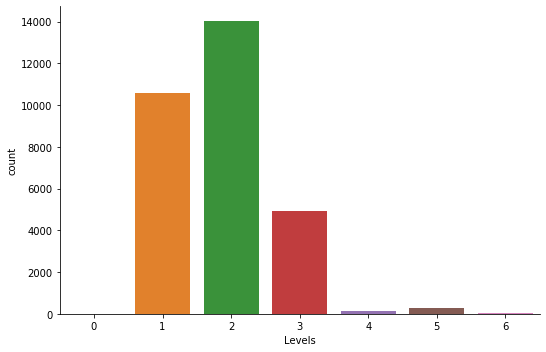

In [30]:
# let's use seaborn to plot the count of customers in each educational level
fEDL = sns.catplot('EDUCATION', data=LoanFile2, kind='count', aspect=1.5)
fEDL.set_xlabels('Levels')

The above plot above showes majority of the loan customers had minimum of high school diploma. We may draw assumption that they have jobs or were employed at the time of loan assumption. Intuitively, this is in line with a typical bank loan customers. We can also infer from the plot above that majority of the customers have at least a university degree. 

From this insight, could we say this creditor specifically targeting customers with at least a college degree for loan approval? How does this affect default rate?

In [31]:
print(LoanFile2['AGE'].max())
print(LoanFile2['AGE'].min())

79
21


In [32]:
bins = [21, 30, 40, 50, 60, 70, 120]
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']
LoanFile2['age_range'] = pd.cut(LoanFile2['AGE'], bins, labels = labels, include_lowest= True)


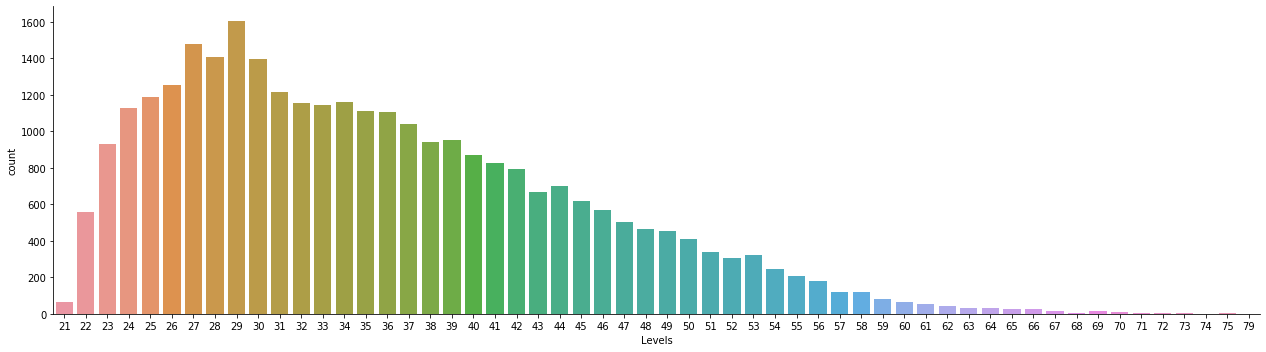

In [33]:
# let's use seaborn to look at distribution of each age
fEDL = sns.catplot('AGE', data=LoanFile2, kind='count', aspect=3.5)
fEDL.set_xlabels('Levels')

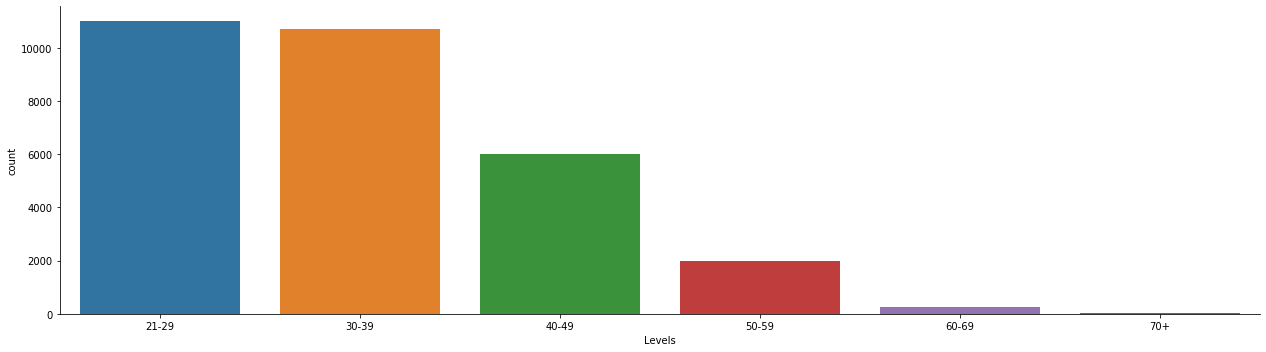

In [34]:
# let's use seaborn to look at distribution of age in bins
fEDL = sns.catplot('age_range', data=LoanFile2, kind='count', aspect=3.5)
fEDL.set_xlabels('Levels')

The above plots show that majority of loan customers fall within ages 21 to 40. Another indication of younger customer base.

In [35]:
# Number of loan defaulted payment in each age range and educational level
LoanFile2.groupby(['age_range', 'EDUCATION', 'default_payment'])['default_payment'].count()

age_range  EDUCATION  default_payment
21-29      0          0                     3
           1          0                  3505
                      1                   799
           2          0                  4098
                      1                  1370
           3          0                   788
                      1                   293
           4          0                    54
                      1                     4
           5          0                    88
                      1                     4
           6          0                     6
                      1                     1
30-39      0          0                     7
           1          0                  3352
                      1                   783
           2          0                  3947
                      1                  1087
           3          0                  1069
                      1                   311
           4          0                   

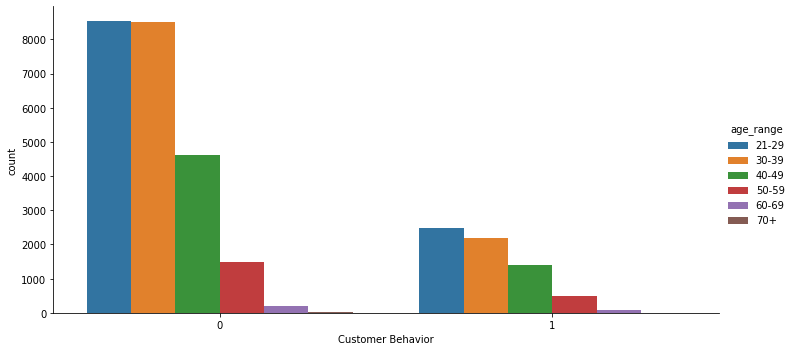

In [36]:
# Again use seaborn to group by customer's behavior (default_payment) and age_range
# 0 = No Default_Payment; 1 = Default_Payment

gd = sns.catplot('default_payment', data=LoanFile2, hue='age_range', kind='count', aspect=2)
gd.set_xlabels('Customer Behavior')


Another insight derived from the data is that the younger customers have higher default_payment rate than older customers. There seems to exist a downward trend, the older the age group the better payment behavior. However, more insight analysis is required to understand if this is due to the population of each age group.

In [37]:
# Number of customers with defaulted payment in each class grouped by age_range. 
# Also total was found for each class grouped by educational level.
LoanFile2.pivot_table('default_payment', 'age_range', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
age_range,,,,,,,,
21-29,0.0,799.0,1370.0,293.0,4.0,4.0,1.0,2471
30-39,0.0,783.0,1087.0,311.0,1.0,6.0,1.0,2189
40-49,0.0,326.0,653.0,408.0,1.0,7.0,4.0,504
50-59,0.0,112.0,192.0,196.0,1.0,1.0,2.0,1399
60-69,NaN,15.0,27.0,26.0,NaN,0.0,0.0,68
70+,NaN,1.0,1.0,3.0,NaN,NaN,NaN,5
All,0.0,2036.0,3330.0,1237.0,7.0,18.0,8.0,6636


In [38]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(LoanFile2.AGE.mean(), 
                                                                          LoanFile2.AGE.median()))

Average and median age of customers are 35 and 34 years old, respectively


In [39]:
# Drop missing values for the records
age = LoanFile2['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

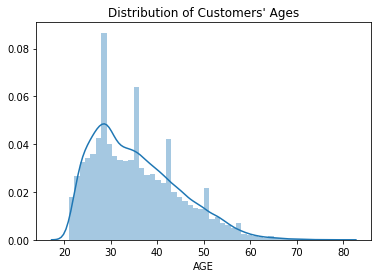

In [40]:
# Distribution of customers age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

In [41]:
LoanFile3 = LoanFile2.drop(['age_range'], axis=1)
LoanFile3.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,24,2,3913,0,689,0,0,0,0,1
1,120000,2,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,2,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,2,57,-1,8617,2000,36681,10000,9000,689,679,0


In [42]:
# create a new preprocessed dataset .csv file to be used for building models
LoanFile4 = LoanFile3.to_csv(r"C:\Users\ietuk\Documents\gitHub_Python\LoanFile4.csv", index = None, header=True)

In [43]:
LoanFile3.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,24,2,3913,0,689,0,0,0,0,1
1,120000,2,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,2,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,2,57,-1,8617,2000,36681,10000,9000,689,679,0


# Using Sci-Kit Learn to Build Models

Sci-Kit Learn will be used to create test/train sets. Here, we will have Training Data divided into two parts: one set for the predictor features (X-values) and a related set for the outcomes (y-values). Both sets should match the training split size of 80%.

My Testing data follows the same rules and contains two sets: one for the X-values or features and a second for the ground truth (y_test), which I will used to compare my predictions to. Testing data is composed of what is left over from the training data, which is 20%.

In [44]:
# imports of lib. for model building
# numpy, scipy, pandas, math, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
from IPython.core.interactiveshell import InteractiveShell

# import estimators models
from sklearn.ensemble import RandomForestClassifier

# cross validation of train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# This allows full output of a cell rather than than just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from scipy.stats import randint as sp_randint
from scipy.stats import beta


Keeping focus on the business problem or objective. The client specifically asked us to use Sci-Kit-Learn library for this analysis because it is likely to be compatible to a custom software solution they plan to deploy.

This analysis will employ a guideline where data tells the story – No assumptions.

# Feature Selection
In this analysis, we will focus the financial data instead of demographic data or attributes. With that in mind, all demographic attributes will be removed because of prior model performances.

In [45]:
# Convert Target attribute to categorical
LoanFile3['default_payment'] = pd.Categorical(LoanFile3.default_payment)

In [46]:
LoanFile3['default_payment'].describe()

count     30000
unique        2
top           0
freq      23364
Name: default_payment, dtype: int64

In [47]:
# select only financial data independent features and dependent variable
x = LoanFile3.iloc[:,3:11]
y = LoanFile3['default_payment']

In [48]:
x.head()

,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,3913,0,689,0,0,0,0
1,-1,2682,0,1000,1000,1000,0,2000
2,0,29239,1518,1500,1000,1000,1000,5000
3,0,46990,2000,2019,1200,1100,1069,1000
4,-1,8617,2000,36681,10000,9000,689,679


# Data Partition

In [49]:
# Selecting features
# select train  and test sets, using 80/20 rule and set.seed at 50 using random_state

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2, random_state = 50)
yt = y_test

In [50]:
x_train.head()

,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14492,0,50286,61101,3210,3911,3354,3400,3500
1072,-1,148341,8405,15052,3805,20467,3253,27168
6092,-2,1198,12003,5000,16864,18000,20025,51514
22895,1,110593,4363,0,4012,3120,2800,3000
20594,0,41266,27004,1613,1484,3675,698,1000


Verifying content of the target

In [51]:
y_test.describe()

count     6000
unique       2
top          0
freq      4733
Name: default_payment, dtype: int64

## Data Normalization

In order to optimized our model, it;s important to normalize our training and testing data.

In [52]:
# Let's take mean of the train and test data as well as the standard deviation of all the columns
mean = x_train.mean(axis=0)
x_train -= mean #subtract the mean from all train data point
STD = x_train.std(axis=0)
x_train /= STD #divide standard deviation from train data point

# supply same mean and standard deviation to testing data
x_test -= mean
x_test /= STD

In [53]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(24000, 8)

(6000, 8)

(24000,)

(6000,)

In [54]:
y_test.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

# Model

In [55]:
# Select model and visualize RF Decision Tree estimate in sklearn
modelRF = RandomForestClassifier(n_estimators=10)

## Fitting the Model

To fit the model, will utilize live-loss plot so we can view the plot as the model is running

In [56]:
#Model Fitting. RF model is selected based on performance metrics previously
modelRF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
#Model Fitting. RF model is selected based on performance metrics previously
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80064992 0.801      0.80222528]


0.9673333333333334

These values correspond to the the following:

1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
2nd value: The time for fitting the estimator on the train set for each cv split.
3rd Value:  The time for scoring the estimator on the test set for each cv split. 

# Making Predictions

Making a prediction with Random Forest model

In [58]:
# predict classification
y_pred = modelRF.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

From the above y_test content results, the followings ("1" for default) or ("0" for no default) will be drawn from the model predictions.

In [59]:
# Calculate the errors
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8106666666666666


## Finding Important Features in Scikit-learn

Finding important features or selecting features in the dataset. In scikit-learn, we'll perform this task in the following steps:

1. create a random forests model.
2. use the feature importance variable to see feature importance scores.
3. visualize these scores using the seaborn library.

In [60]:
import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

BILL_AMT1    0.171901
PAY_0        0.169119
PAY_AMT1     0.122736
PAY_AMT2     0.118369
PAY_AMT3     0.104996
PAY_AMT5     0.104881
PAY_AMT4     0.104198
PAY_AMT6     0.103800
dtype: float64

## Visualization of Feature Importance

We can also visualize the feature importance using matplotlib and seaborn, which makes it easy to understand and interpretable.


Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


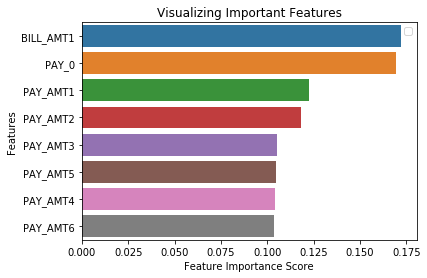

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

The above chart corresponds with the feature importance scores represented above.

## Evaluating Performance

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

RF_mc = cross_val_score(modelRF, x, y, cv=10, scoring='roc_auc')

In [63]:
# print out the results of evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(RF_mc)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", RF_mc.mean())

=== Confusion Matrix ===
[[4457  276]
 [ 860  407]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4733
           1       0.60      0.32      0.42      1267

    accuracy                           0.81      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.79      0.81      0.79      6000



=== All AUC Scores ===
[0.69260096 0.69247465 0.69860056 0.68619471 0.71275556 0.73261529
 0.739973   0.72041293 0.73760337 0.71865186]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7131882890824538


The confusion matrix above, classification report tells us the accuracy of your model. The ROC curve plots out the true positive rate versus the false positive rate at various thresholds. The roc_auc scoring used in the cross-validation model shows the area under the ROC curve. We’ll evaluate our model’s score based on the roc_auc score, which is .712. 
The next thing to consider is tunning the hyperparameters to see if the model performance can be improved.

## Tuning Hyperparameters

According to Will Koehrsen article "https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74", "In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training)".

In [64]:
# use RandomizedSearchCV from sklearn to optimize our hyperparamaters. Will keep low Kfold CV due to large data set
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
RF_random = RandomizedSearchCV(estimator = modelRF, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=50, n_jobs = -1)

# Fit the model
RF_random.fit(x_train, y_train)

# print results
print(RF_random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 17.0min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

{'n_estimators': 1800, 'max_features': 'sqrt', 'max_depth': 140}


The result above is plugged back into the model to see if it improves the performance.

In [65]:
# Input the hyperparameters tuning results into random forest model
modelRF = RandomForestClassifier(n_estimators=1400, max_depth=100, max_features='sqrt')

modelRF.fit(x_train,y_train)
y_pred = modelRF.predict(x_test)
RF_mc = cross_val_score(modelRF, x, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(RF_mc)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", RF_mc.mean())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

=== Confusion Matrix ===
[[4465  268]
 [ 823  444]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4733
           1       0.62      0.35      0.45      1267

    accuracy                           0.82      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



=== All AUC Scores ===
[0.71578354 0.72026714 0.72918503 0.70844385 0.73870256 0.76256621
 0.77286624 0.74507286 0.75173105 0.75043389]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7395052388371018


From the output above, there was a slight improvement in the results. Our roc_auc score improved from 71% to about 74%.
The confusion matrix above represents that the model correctly predicted that client's behavior of not default (Y = 0) about 74% of the time.